# Estadística Aplicada
## Katya Guadalupe Chagoya García 1912500
### Sesion 10a - 7 marzo 2023 

In [1]:
#librarias de cajon
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# librerias de supervivencia
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi = load_rossi()

Este conjunto de datos es originalmente de Rossi et al. (1980). Los datos se refieren a 432 convictos que fueron liberados de prisiones estatales de Maryland en la década de 1970 y que fueron seguidos durante un año después de su liberación (52 semanas). La mitad de los reclusos liberados fueron asignados al azar a un tratamiento experimental en el que recibieron ayuda económica; la mitad no recibió ayuda.


Rossi, P.H., R.A. Berk, and K.J. Lenihan (1980). Money, Work, and Crime: Some Experimental Results. New York: Academic Press.



In [3]:
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


**week**: tiempo de supervivencia en semanas. desde que se libero hasta que vuelve a ser arrestado.

**arrest**:(evento) 1 si fue arrestado, 0 si no .

**fin**: 1 si recibió ayuda en dinero, 0 no recibió.

**age**: edad cuando fue liberado.

**race**: 1 negro, 0 otra raza (white, hispanic, etc).

**wexp**: 1 trabajo tiempo completo cuando fue arrestado, 0.

**mar**: 1 si estas casado al momento de la liberación, 0 si no.

**paro**: libertad condicional 1, 0 .

**prio**: encarcelamientos anteriores.

**hipótesis**
1. Recibir ayuda (dinero) dismunye el riesgo  de volver a ser arrestado. Si la persona tiene tiene dinero no necesita cometer ningún delito y por tanto no lo vuelven a arrestar.

2. los jovénes son mas inexpertos y por tanto tienen mayor riesgo de volver a ser arrestados.

3. Ser negro incrementa el riesgo de volver a ser arrestado, por el racismo que hay EE.UU.

4. Tener trabajo cuando te arrestaron disminuye el riesgo de volver a ser arrestado. Si tenias trabajo, tienes experiencia laboral y sería más fácil que te contraten
 
5.estar casado, no dejar abandonada a su pareja y no se arriesga a cometer delitos 

6. Si esta en libertad condicional, no quiere regresar a la cárcel por tanto no comete delitos y el riesgo de volver a ser arrestado disminuye

7. Entre mas veces haya estado en la cárcel es mayor el riesgo de volver a ser arrestado.


In [4]:
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [5]:
arrestados = rossi.query('arrest==1')
no_arrest = rossi.query('arrest==0')

In [6]:
arrestados.describe().round()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0
mean,29.0,1.0,0.0,23.0,1.0,0.0,0.0,1.0,4.0
std,14.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0
min,1.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
25%,17.0,1.0,0.0,19.0,1.0,0.0,0.0,0.0,1.0
50%,28.0,1.0,0.0,21.0,1.0,0.0,0.0,1.0,3.0
75%,42.0,1.0,1.0,25.0,1.0,1.0,0.0,1.0,5.0
max,52.0,1.0,1.0,44.0,1.0,1.0,1.0,1.0,18.0


In [7]:
no_arrest.describe().round()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,318.0,318.0,318.0,318.0,318.0,318.0,318.0,318.0,318.0
mean,52.0,0.0,1.0,25.0,1.0,1.0,0.0,1.0,3.0
std,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0
min,52.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
25%,52.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,1.0
50%,52.0,0.0,1.0,23.0,1.0,1.0,0.0,1.0,2.0
75%,52.0,0.0,1.0,28.0,1.0,1.0,0.0,1.0,3.0
max,52.0,0.0,1.0,44.0,1.0,1.0,1.0,1.0,15.0


In [8]:
rossi.groupby('arrest')['mar'].describe()

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,0.141509,0.349096,0.0,0.0,0.0,0.0,1.0
1,114.0,0.070175,0.256570,0.0,0.0,0.0,0.0,1.0


In [9]:
rossi.groupby('arrest')['prio'].describe()

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,2.701258,2.552057,0.0,1.0,2.0,3.0,15.0
1,114.0,3.771930,3.587182,0.0,1.0,3.0,5.0,18.0


# hipótesis
fin: i recibe ayuda(dinero) será menos probable que lo arreston ( no va a tener necesidad de robar)

age: Los jovenes tienen mas riesgo de volver a ser arrestados, son ms descuidados al cometer un delito.

race:es mas probable que lo vuelvan a arrestar si es negro.

wexp:menos probable.

mar:si esta casado menos probable

paro:no, se esforzo en salir y no regresará tan fácil.

prio: si, chango viejo no aprende maroma nueva.

**Objetivo**
Determinar si el reciir ayuda (dinero) al salir de la cárcel causa que el riesgo de volver a ser arrestado disminuya.

In [10]:
# otro camino 
rossi.groupby('arrest').agg(['mean', 'std', 'count'])

week                        fin                        age  \
             mean        std count      mean       std count       mean   
arrest                                                                    
0       52.000000   0.000000   318  0.528302  0.499985   318  25.254717   
1       28.710526  14.447784   114  0.421053  0.495908   114  22.763158   

                            race  ...  wexp       mar                  \
             std count      mean  ... count      mean       std count   
arrest                            ...                                   
0       6.309666   318  0.871069  ...   318  0.141509  0.349096   318   
1       5.123782   114  0.894737  ...   114  0.070175  0.256570   114   

            paro                      prio                  
            mean       std count      mean       std count  
arrest                                                      
0       0.625786  0.484682   318  2.701258  2.552057   318  
1       0.596491  0.492767   114  3.771930  3.587182   114  

[2 rows x 24 columns]

In [11]:
rossi.groupby('arrest').agg('mean').round()

,week,fin,age,race,wexp,mar,paro,prio
arrest,,,,,,,,
0,52.0,1.0,25.0,1.0,1.0,0.0,1.0,3.0
1,29.0,0.0,23.0,1.0,0.0,0.0,1.0,4.0


In [12]:
rossi.groupby('arrest').agg('std').round()

,week,fin,age,race,wexp,mar,paro,prio
arrest,,,,,,,,
0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0
1,14.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0


In [13]:
rossi.groupby('arrest').agg('count').round()

,week,fin,age,race,wexp,mar,paro,prio
arrest,,,,,,,,
0,318,318,318,318,318,318,318,318
1,114,114,114,114,114,114,114,114


In [14]:
rossi.value_counts('arrest')

arrest
0    318
1    114
dtype: int64

In [15]:
#estimar el modelo
cph = CoxPHFitter().fit(rossi,'week','arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-10 20:51:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

$H_0:/beta_i = 0$ Variable no afecta
$H_0:/beta_i =? 0$ Variable si afecta 

1. Verificar p-values 
Signo de coef nos va a indicar si el riesgo aumenta o disminuye.
Si coef es menor que cero (negativo) 1-exp(coef) = %
Si coef oes ´positivo exp(coef)-1 = %
*fin es recibir dinero* 
Evento: volver a ser arrestado 1-.68=32%
    
Recibir ayuda(dinero) disminuye el riesgo de volver a ser arrestado

En promedio alguien que recibe ayuda tiene 32% menos riesgo de ser arrestado que alguien que no recibe ayuda 

Edad disminuye el riesgo del evento / Disminuye el riesgo de volver a ser arrestado
1-0.94 = 6%
Para cada año cumplido, el riesgo de volver a ser arrestado disminuye 6%

Haber sido arrestado en el pasado aumenta el riesgo de volver a ser arrestado 
1.10-1 = 10%
Por cada vez que fue arrestado el riesgo de volver a ser arrestado aumenta un 10%

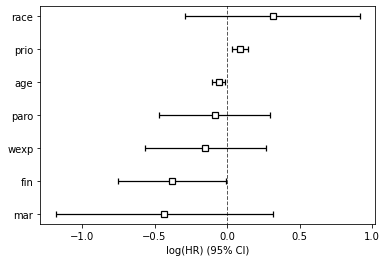

In [18]:
cph.plot();

<AxesSubplot:>

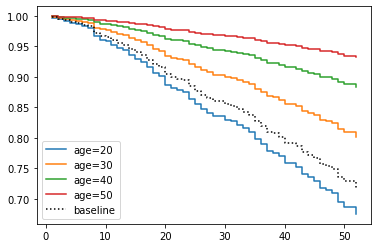

In [19]:
cph.plot_partial_effects_on_outcome(covariates='age',values=[20,30,40,50])